In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(143)


In [120]:
stock_price = pd.read_csv("stock_data_2_yrs_daywise.csv")
stock_price.set_index('Date', inplace = True)

In [121]:
returns = (stock_price - stock_price.shift(1))/stock_price.shift(1)
returns.dropna(axis = 0, inplace = True)

In [122]:
returns.shape[1]

50

In [123]:
noOfPortfolios = 10000
n_asset = 50
weight = np.zeros((noOfPortfolios, n_asset))
expectedReturn = np.zeros(noOfPortfolios) #initial assignment
expectedVolatility = np.zeros(noOfPortfolios) #initial assignment
sharpeRatio = np.zeros(noOfPortfolios)
meanReturn = returns.mean()

covmatrix = returns.cov()

for k in range(noOfPortfolios):
  #generate random weight vector
    w = np.array(np.random.random(n_asset))
    w = w / np.sum(w)
    weight[k,:] = w
    #expected return
    expectedReturn[k] = np.sum(meanReturn * w)
    #expected volatility
    expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(covmatrix, w)))
    #sharpe ratio
    sharpeRatio[k] = expectedReturn[k] / expectedVolatility[k]


Maximising the sharpe Ratio

In [124]:
maxIndex = sharpeRatio.argmax()
maxIndex

9911

In [125]:
weight[maxIndex, :]

array([0.01902488, 0.02741935, 0.01874994, 0.02919263, 0.02307825,
       0.00778231, 0.00607377, 0.04341738, 0.02039478, 0.01940389,
       0.03896371, 0.0030838 , 0.02912168, 0.02129633, 0.03293515,
       0.00509239, 0.0394395 , 0.01016329, 0.00543922, 0.03773412,
       0.02445325, 0.0044301 , 0.03814457, 0.04202195, 0.00527903,
       0.01780661, 0.00409086, 0.00685028, 0.02612948, 0.00386995,
       0.01087301, 0.02499758, 0.0063111 , 0.00086324, 0.01269925,
       0.03219214, 0.00184429, 0.04319282, 0.00938182, 0.02041458,
       0.02290659, 0.02754764, 0.00443746, 0.04017196, 0.02765809,
       0.00217019, 0.04235354, 0.01439227, 0.03134704, 0.01336297])

Scatterplot for Returns vs Volatility

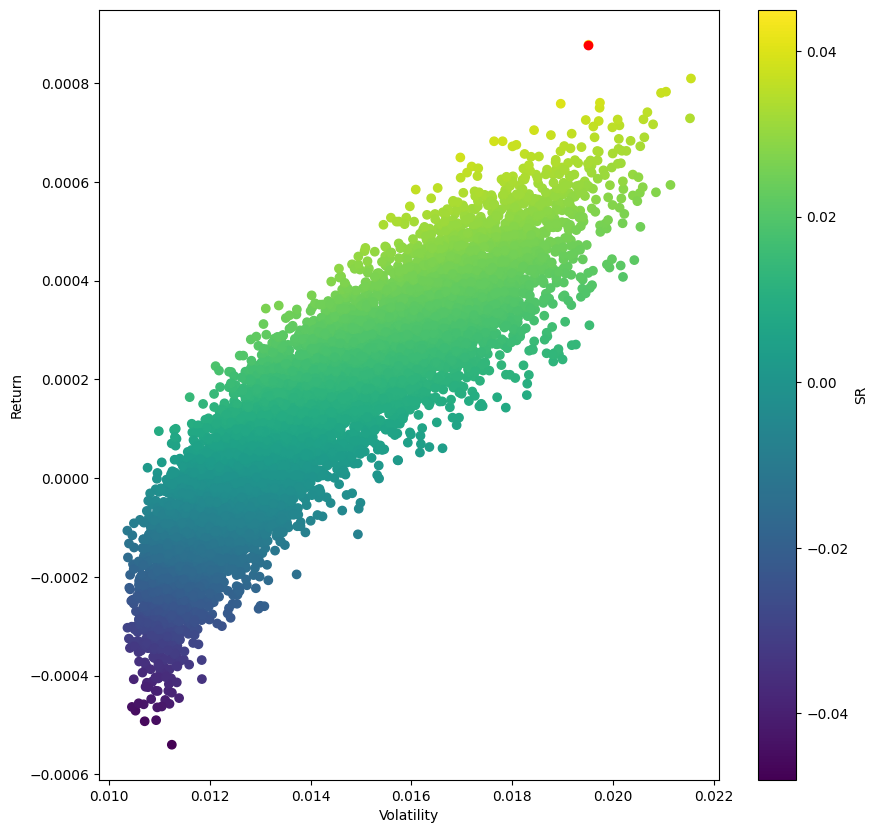

In [126]:
plt.figure(figsize=(10,10))
plt.scatter(expectedVolatility, expectedReturn, c = sharpeRatio)

plt.xlabel('Volatility')
plt.ylabel('Return')

plt.colorbar(label = 'SR')
plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], color = 'red')

plt.show()

In [127]:
optimalWeight = weight[maxIndex]

In [128]:

totalCapital = 100000
optInvestment = pd.DataFrame(optimalWeight*totalCapital)
# optInvestment.round(3)

In [129]:
cols = returns.columns
optInvestment.set_index(cols, inplace = True)

In [130]:
optInvestment['Investment'] = optInvestment[0]
optInvestment.drop([0], axis = 1, inplace = True)
optInvestment.round(3)

,Investment
AdaniPorts,1902.488
Ambuja,2741.935
Apollo,1874.994
AxisBank,2919.263
Bajaj,2307.825
BoB,778.231
Bata,607.377
BlueStar,4341.738
Camlin,2039.478
Castrol,1940.389


In [131]:
from scipy.optimize import minimize

In [132]:
def negativeSharpe(w):
  w = np.array(w)
  Ret = np.sum(meanReturn * w)
  Vol = np.sqrt(np.dot(w.T, np.dot(covmatrix, w)))
  SR = Ret/Vol #return/volatility
  return -1*SR

def checkSumToOne(w): #to check if the sums come upto zero
  return np.sum(w) - 1 #if it's one this returns zero

w0 = [1/n_asset for i in range(n_asset)]
bounds = [(0,1)] * n_asset #bounds on the weight vector
constraints = ({'type':'eq', 'fun':checkSumToOne})

w_opt = minimize(negativeSharpe, w0, method = 'SLSQP', bounds = bounds, constraints = constraints) #method = sequential least squares



In [133]:
w_opt.x

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.67484464e-16,
       1.69656061e-17, 2.10373404e-16, 1.52124128e-16, 4.90386819e-02,
       9.13945874e-17, 1.91722186e-17, 0.00000000e+00, 5.92698211e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.29295293e-18,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.31835627e-02, 3.53008832e-18, 0.00000000e+00, 3.60315361e-02,
       8.34050586e-17, 2.62581574e-18, 0.00000000e+00, 0.00000000e+00,
       4.68368848e-01, 8.33885770e-18, 5.34557926e-17, 2.39347178e-01,
       0.00000000e+00, 1.61737265e-16, 7.59664496e-03, 4.99288941e-17,
       9.73212144e-17, 9.19888601e-18, 6.62237088e-17, 6.44290805e-18,
       8.46485146e-17, 1.94460358e-17, 0.00000000e+00, 2.19909621e-02,
       1.19472332e-17, 0.00000000e+00, 1.14442586e-01, 1.14703181e-16,
       0.00000000e+00, 0.00000000e+00])

In [134]:
optInvestment['At min risk investment'] = (w_opt.x*totalCapital).round(3)
optInvestment.round(3)

,Investment,At min risk investment
AdaniPorts,1902.488,0.000
Ambuja,2741.935,0.000
Apollo,1874.994,0.000
AxisBank,2919.263,0.000
Bajaj,2307.825,0.000
BoB,778.231,0.000
Bata,607.377,0.000
BlueStar,4341.738,4903.868
Camlin,2039.478,0.000
Castrol,1940.389,0.000


In [135]:
#Total Return and Variance Risk

totalReturn = np.sum(optInvestment['Investment']*meanReturn)
varRisk = np.dot(optimalWeight.T, np.dot(covmatrix, optimalWeight))
print("Total return = ", totalReturn)
print("Variance Risk = ", varRisk)

Total return =  87.78075184836581
Variance Risk =  0.0003807777116137831


A.  Markowitz Model I: minimize wTΩ w   subject to  eTw=1, short selling is allowed.

B. Markowitz Model II: minimize wTΩ w   subject to  eTw=1, short selling is not allowed.

C : Markowitz Model III: minimize wTΩ w   subject to  eTw=1, and total return is exactly 5%,  short selling is allowed.

D:  Markowitz Model IV: minimize  wTΩ w subject to eTw= 1, and total return is a minimum of 5%, short selling is allowed


Short selling is allowed
wi = [-1, 1]

In [136]:
noOfPortfolios = 10000
n_asset = 50
weight = np.zeros((noOfPortfolios, n_asset))
expectedReturn = np.zeros(noOfPortfolios) #initial assignment
expectedVolatility = np.zeros(noOfPortfolios) #initial assignment
sharpeRatio = np.zeros(noOfPortfolios)
meanReturn = returns.mean()

covmatrix = returns.cov()

for k in range(noOfPortfolios):
  #generate random weight vector
    w = np.array(np.random.uniform(1, -1, n_asset))
    w = w / np.sum(w)
    weight[k,:] = w
    #expected return
    expectedReturn[k] = np.sum(meanReturn * w)
    #expected volatility
    expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(covmatrix, w)))
    #sharpe ratio
    sharpeRatio[k] = expectedReturn[k] / expectedVolatility[k]


In [137]:
maxIndx_short_sell = sharpeRatio.argmax()
maxIndx_short_sell

9309

In [138]:
optimalWeight_short_sell = weight[maxIndx_short_sell]
optInvestment['Investment'] = optimalWeight_short_sell*totalCapital
optInvestment.drop(['At min risk investment'], axis = 1, inplace = True)
optInvestment.round(3)

,Investment
AdaniPorts,42913.622
Ambuja,35099.558
Apollo,266.741
AxisBank,14992.906
Bajaj,-49316.625
BoB,-50453.321
Bata,47478.867
BlueStar,38335.424
Camlin,-51420.234
Castrol,23312.721


In [139]:
#minimum risk

w01 = [1/n_asset for i in range(n_asset)]
bounds = [(-1,1)] * n_asset #bounds on the weight vector
constraints = ({'type':'eq', 'fun':checkSumToOne})

w_opt_short_sell = minimize(negativeSharpe, w01, method = 'SLSQP', bounds = bounds, constraints = constraints)

In [140]:
# w_opt_short_sell.x

In [141]:
optInvestment['At min risk investment'] = (w_opt_short_sell.x*totalCapital).round(3)
optInvestment.round(3)

,Investment,At min risk investment
AdaniPorts,42913.622,38128.356
Ambuja,35099.558,25480.672
Apollo,266.741,-71201.776
AxisBank,14992.906,-41260.032
Bajaj,-49316.625,8547.833
BoB,-50453.321,-88466.025
Bata,47478.867,-42099.029
BlueStar,38335.424,12860.435
Camlin,-51420.234,-37701.652
Castrol,23312.721,77008.570


In [142]:
#Total Return and Variance Risk

totalReturn = np.sum(optInvestment['At min risk investment']*meanReturn.T)
varRisk = np.dot(optimalWeight_short_sell.T, np.dot(covmatrix, optimalWeight_short_sell))
print("Total return = ", totalReturn)
print("Variance Risk = ", varRisk)


Total return =  1610.4447042676945
Variance Risk =  0.004713437835024934


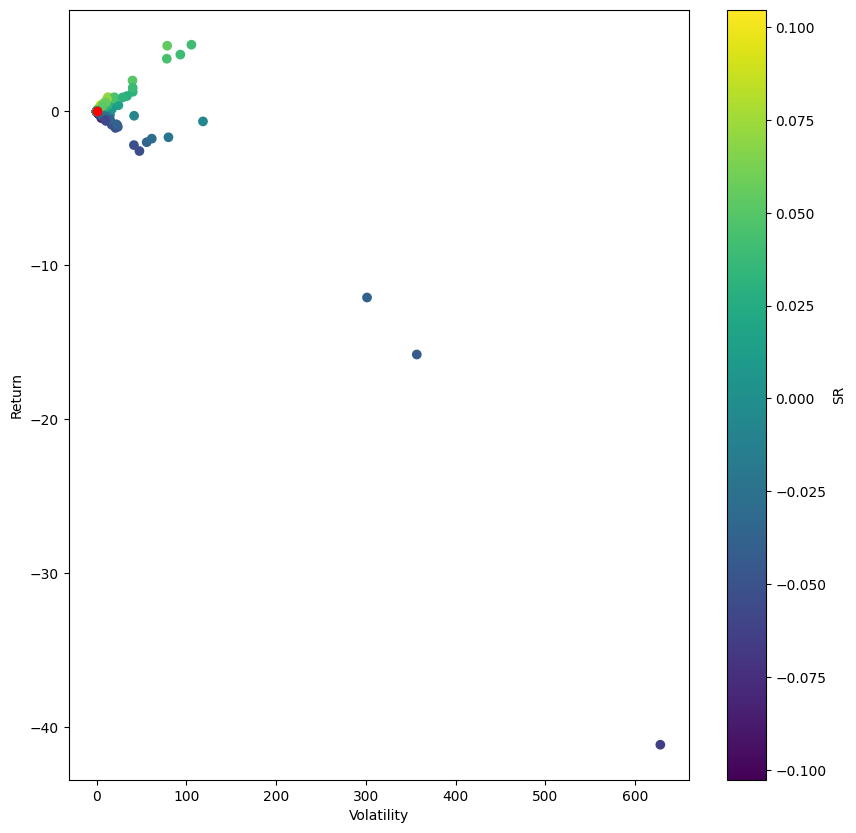

In [155]:
plt.figure(figsize=(10,10))
plt.scatter(expectedVolatility, expectedReturn, c = sharpeRatio)

plt.xlabel('Volatility')
plt.ylabel('Return')

plt.colorbar(label = 'SR')
plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], color = 'red')

plt.show()

Short Selling allowed, Return is exactly 5%


In [156]:
noOfPortfolios = 10000
n_asset = 50
weight = np.zeros((noOfPortfolios, n_asset))
expectedReturn = np.zeros(noOfPortfolios) #initial assignment
expectedVolatility = np.zeros(noOfPortfolios) #initial assignment
sharpeRatio = np.zeros(noOfPortfolios)
meanReturn = returns.mean()

covmatrix = returns.cov()

for k in range(noOfPortfolios):
  #generate random weight vector
    w = np.array(np.random.uniform(1, -1, n_asset))
    w = w / np.sum(w)
    weight[k,:] = w
    #expected return
    expectedReturn[k] = np.sum(meanReturn * w)
    #expected volatility
    expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(covmatrix, w)))
    #sharpe ratio
    sharpeRatio[k] = expectedReturn[k] / expectedVolatility[k]


In [157]:
maxIndx_short_sell_return5 = sharpeRatio.argmax()
maxIndx_short_sell_return5

1464

In [158]:
optimalWeight_short_sell_return5 = weight[maxIndx_short_sell_return5]
optInvestment['Investment'] = optimalWeight_short_sell_return5*totalCapital
# optInvestment.drop(['At min risk investment'], axis = 1, inplace = True)
optInvestment.round(3)

,Investment,At min risk investment
AdaniPorts,67484.189,100000.000
Ambuja,6693.882,100000.000
Apollo,4018.987,-100000.000
AxisBank,1669.430,-100000.000
Bajaj,34249.567,100000.000
BoB,-12622.280,-100000.000
Bata,-39571.763,-100000.000
BlueStar,21279.211,100000.000
Camlin,-23475.402,-100000.000
Castrol,16271.044,100000.000


In [159]:
def constr1(w):
  return np.sum(w) - 1

def constr2(w):
  return np.sum(meanReturn*w*totalCapital) - (0.05*totalCapital)

w02 = [1/n_asset for i in range(n_asset)]
bounds = [(-1,1)] * n_asset

con1 = {'type': 'eq', 'fun': constr1}
con2 = {'type': 'eq', 'fun': constr2}
constraints = ([con1, con2])

w_opt_return_eq_5 = minimize(negativeSharpe, w02, method = 'SLSQP', bounds = bounds, constraints = constraints)

In [160]:
optInvestment['At min risk investment'] = (w_opt_return_eq_5.x*totalCapital).round(3)
optInvestment.round(3)

,Investment,At min risk investment
AdaniPorts,67484.189,100000.000
Ambuja,6693.882,100000.000
Apollo,4018.987,-100000.000
AxisBank,1669.430,-100000.000
Bajaj,34249.567,100000.000
BoB,-12622.280,-100000.000
Bata,-39571.763,-100000.000
BlueStar,21279.211,100000.000
Camlin,-23475.402,-100000.000
Castrol,16271.044,100000.000


In [161]:
#Total Return and Variance Risk

totalReturn = np.sum(optInvestment['At min risk investment']*meanReturn.T)
varRisk = np.dot(optimalWeight_short_sell_return5.T, np.dot(covmatrix, optimalWeight_short_sell_return5))
print("Total return = ", totalReturn)
print("Variance Risk = ", varRisk)


Total return =  4999.99999604108
Variance Risk =  0.010018495409200618


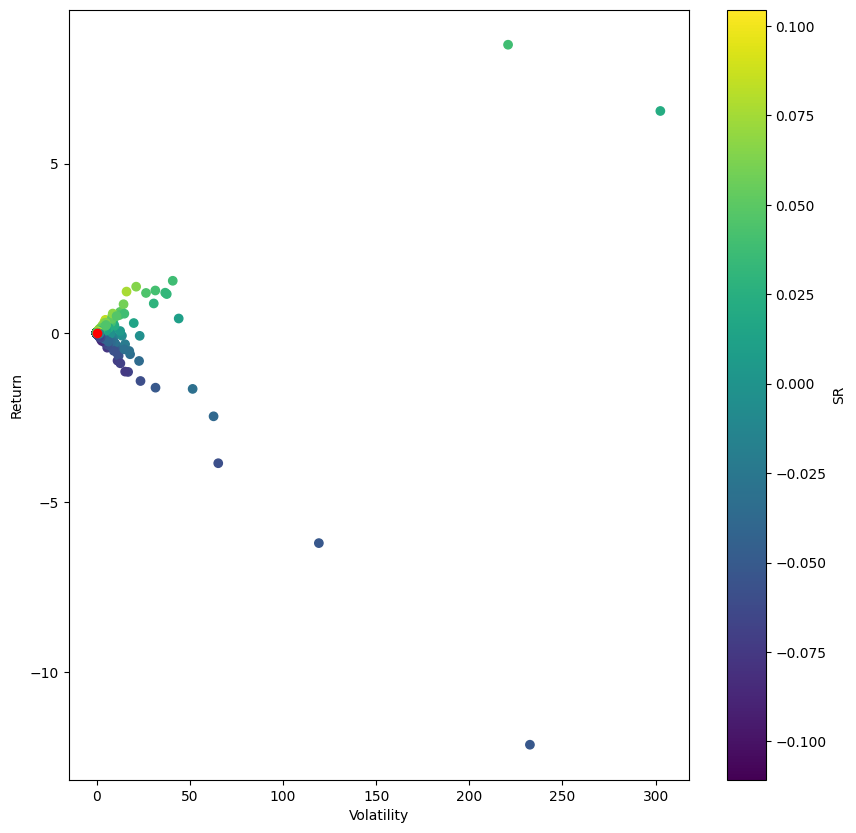

In [162]:
plt.figure(figsize=(10,10))
plt.scatter(expectedVolatility, expectedReturn, c = sharpeRatio)

plt.xlabel('Volatility')
plt.ylabel('Return')

plt.colorbar(label = 'SR')
plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], color = 'red')

plt.show()

Minimum return is 5%

In [149]:
noOfPortfolios = 10000
n_asset = 50
weight = np.zeros((noOfPortfolios, n_asset))
expectedReturn = np.zeros(noOfPortfolios) #initial assignment
expectedVolatility = np.zeros(noOfPortfolios) #initial assignment
sharpeRatio = np.zeros(noOfPortfolios)
meanReturn = returns.mean()

covmatrix = returns.cov()

for k in range(noOfPortfolios):
  #generate random weight vector
    w = np.array(np.random.uniform(1, -1, n_asset))
    w = w / np.sum(w)
    weight[k,:] = w
    #expected return
    expectedReturn[k] = np.sum(meanReturn * w)
    #expected volatility
    expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(covmatrix, w)))
    #sharpe ratio
    sharpeRatio[k] = expectedReturn[k] / expectedVolatility[k]


In [150]:
maxIndx_short_sell_returnmin5 = sharpeRatio.argmax()
maxIndx_short_sell_returnmin5

3314

In [151]:
optimalWeight_short_sell_returnmin5 = weight[maxIndx_short_sell_returnmin5]
optInvestment['Investment'] = optimalWeight_short_sell_returnmin5*totalCapital
# optInvestment.drop(['At min risk investment'], axis = 1, inplace = True)
# optInvestment.round(3)

In [152]:
def constr1(w):
  return np.sum(w) - 1

def constr2(w):
  return np.sum(meanReturn*w*totalCapital) - (0.05*totalCapital)

w03 = [1/n_asset for i in range(n_asset)]
bounds = [(-1,1)] * n_asset

con1 = {'type': 'eq', 'fun': constr1}
con2 = {'type': 'ineq', 'fun': constr2}
constraints = ([con1, con2])

w_opt_returnmin_eq_5 = minimize(negativeSharpe, w03, method = 'SLSQP', bounds = bounds, constraints = constraints)

In [153]:
optInvestment['At min risk investment'] = (w_opt_returnmin_eq_5.x*totalCapital).round(3)
optInvestment.round(3)

,Investment,At min risk investment
AdaniPorts,-3460.578,100000.000
Ambuja,34788.585,100000.000
Apollo,51034.266,-100000.000
AxisBank,-8941.114,-100000.000
Bajaj,26313.684,100000.000
BoB,8358.152,-100000.000
Bata,10431.090,-100000.000
BlueStar,21555.117,100000.000
Camlin,-5820.292,-100000.000
Castrol,-6486.972,100000.000


In [154]:
#Total Return and Variance Risk

totalReturn = np.sum(optInvestment['At min risk investment']*meanReturn.T)
varRisk = np.dot(optimalWeight_short_sell_returnmin5.T, np.dot(covmatrix, optimalWeight_short_sell_returnmin5))
print("Total return = ", totalReturn)
print("Variance Risk = ", varRisk)


Total return =  4999.999996955473
Variance Risk =  0.00856854689185925


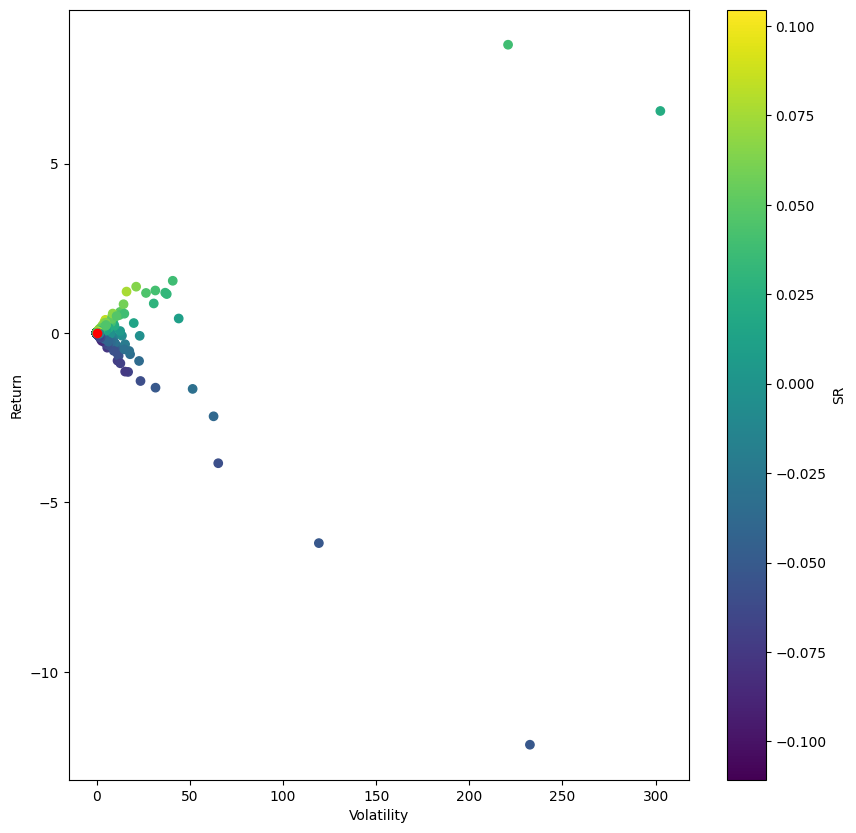

In [163]:
plt.figure(figsize=(10,10))
plt.scatter(expectedVolatility, expectedReturn, c = sharpeRatio)

plt.xlabel('Volatility')
plt.ylabel('Return')

plt.colorbar(label = 'SR')
plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], color = 'red')

plt.show()